We first read the sample file and convert it to json format.

In [21]:
import pandas as pd
ts = pd.read_csv("uc7_datasets/Energy_Ameno_2_8_0_BBB6062.Wh.csv",
                     sep=None,
                     header=0,
                     index_col=0,
                     parse_dates=True,
                     engine='python')
ts = ts[ts.index >= pd.Timestamp("2023-01-01 00:00:00")]
series = ts.to_json()

Then we make the request using the time horizon (n), series in json format (series) and meter_id (meter_id) we want

In [22]:
import requests

from requests_toolbelt.multipart.encoder import MultipartEncoder
input_example = MultipartEncoder(
    fields={"n": "72",
            "series": series,
            "meter_id": "Energy_Ameno_2_8_0_BBB6062.Wh",
           }
)

result = requests.post(
    "http://0.0.0.0:3090/predict_uc7", data=input_example, headers={"Content-Type": input_example.content_type}
).text

In [23]:
result

'{"Value":{"1703692800000":-0.0096,"1703696400000":-0.0096,"1703700000000":-0.0096,"1703703600000":-0.0096,"1703707200000":-0.0096,"1703710800000":-0.0096,"1703714400000":-0.0096,"1703718000000":-0.0096,"1703721600000":-0.0096,"1703725200000":-0.0096,"1703728800000":-0.0096,"1703732400000":-0.0096,"1703736000000":-0.0096,"1703739600000":-0.0096,"1703743200000":-0.0096,"1703746800000":-0.0096,"1703750400000":2.4704077267,"1703754000000":7.2432496494,"1703757600000":10.488605205,"1703761200000":11.8023012486,"1703764800000":11.4342764365,"1703768400000":9.4727222425,"1703772000000":5.9531300493,"1703775600000":1.9309565346,"1703779200000":-0.0096,"1703782800000":-0.0096,"1703786400000":-0.0096,"1703790000000":-0.0096,"1703793600000":-0.0096,"1703797200000":-0.0096,"1703800800000":-0.0096,"1703804400000":-0.0096,"1703808000000":-0.0096,"1703811600000":-0.0096,"1703815200000":-0.0096,"1703818800000":-0.0096,"1703822400000":-0.0096,"1703826000000":-0.0096,"1703829600000":-0.0096,"1703833200

Finaly we convert the result to pandas format 

In [12]:
df = pd.read_json(result)

In [13]:
df

,Value
2023-12-27 16:00:00,-0.009600
2023-12-27 17:00:00,-0.009600
2023-12-27 18:00:00,-0.009600
2023-12-27 19:00:00,-0.009600
2023-12-27 20:00:00,-0.009600
...,...
2023-12-30 11:00:00,11.371750
2023-12-30 12:00:00,11.434655
2023-12-30 13:00:00,9.436796
2023-12-30 14:00:00,5.910178


<Axes: xlabel='Datetime'>

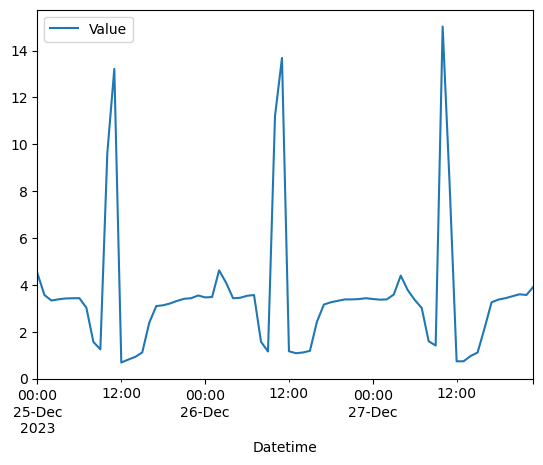

In [8]:
#Energy_Apiu_1_8_0_BBB6030.Wh (company) real
ts[ts.index >= pd.Timestamp("2023-12-25 00:00:00")].plot()

<Axes: >

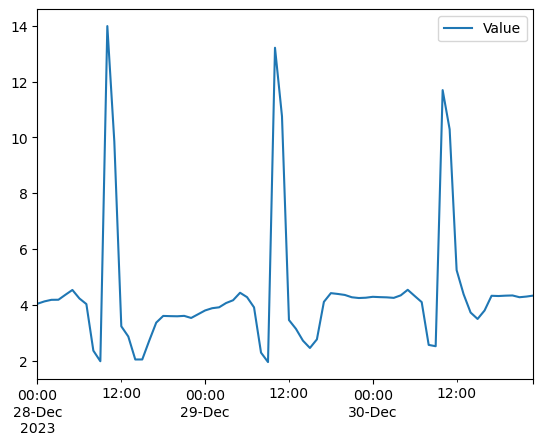

In [13]:
#Energy_Apiu_1_8_0_BBB6030.Wh (company) prediction
df.plot()

<Axes: xlabel='Datetime'>

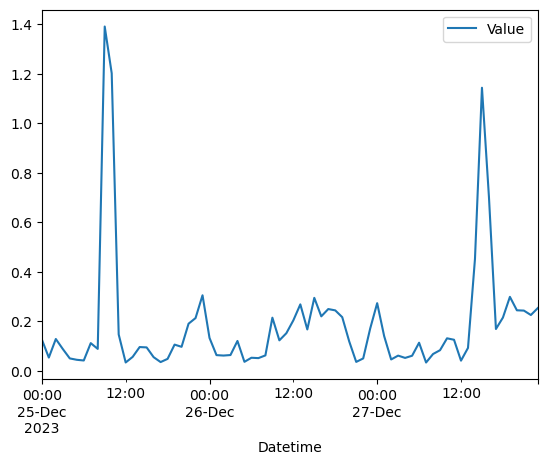

In [22]:
#Energy_Apiu_1_8_0_BBB6152.Wh (households) real
ts[ts.index >= pd.Timestamp("2023-12-25 00:00:00")].plot()

<Axes: >

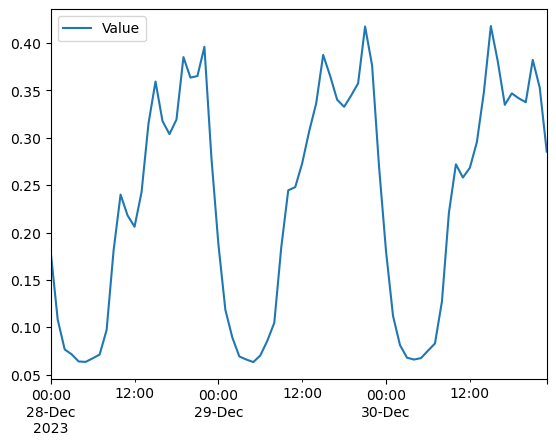

In [28]:
#Energy_Apiu_1_8_0_BBB6152.Wh (households) prediction
df.plot()

<Axes: xlabel='Datetime'>

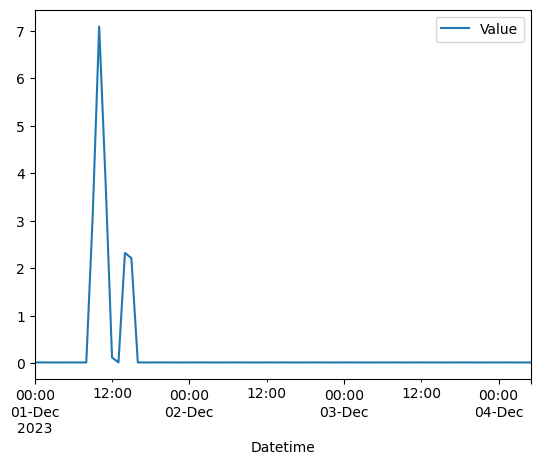

In [36]:
#Energy_Apiu_1_8_0_BBB6103.Wh (charging station) real
ts[ts.index >= pd.Timestamp("2023-12-01 00:00:00")].plot()

<Axes: >

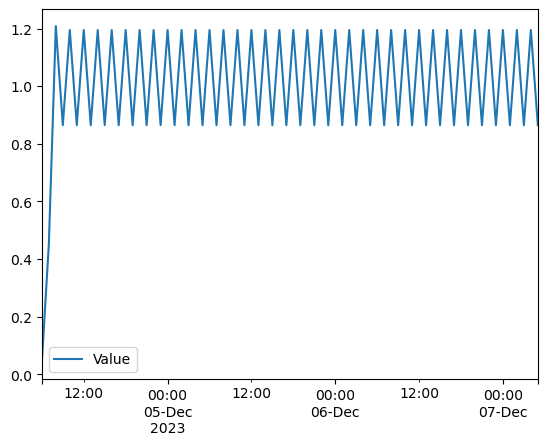

In [42]:
#Energy_Apiu_1_8_0_BBB6103.Wh (charging station) prediction
df.plot()

<Axes: xlabel='Datetime'>

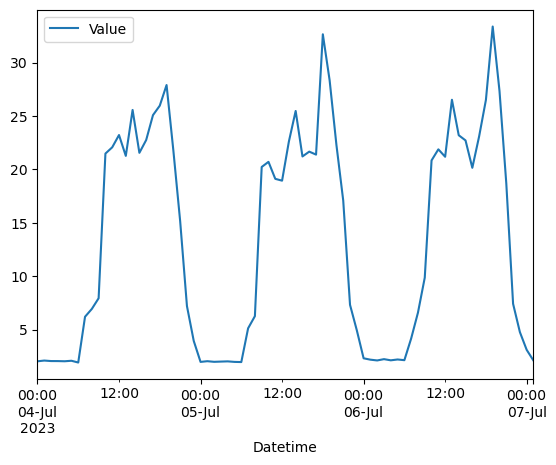

In [46]:
#Energy_Apiu_1_8_0_BBB6028.Wh (pool) real
ts[ts.index >= pd.Timestamp("2023-07-04 00:00:00")].plot()

<Axes: >

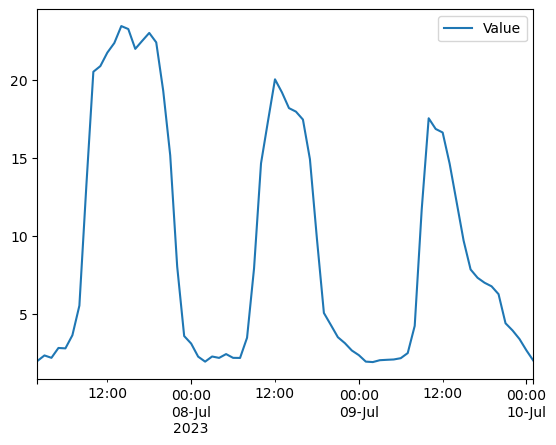

In [51]:
#Energy_Apiu_1_8_0_BBB6028.Wh (pool) pred
df.plot()

<Axes: xlabel='Datetime'>

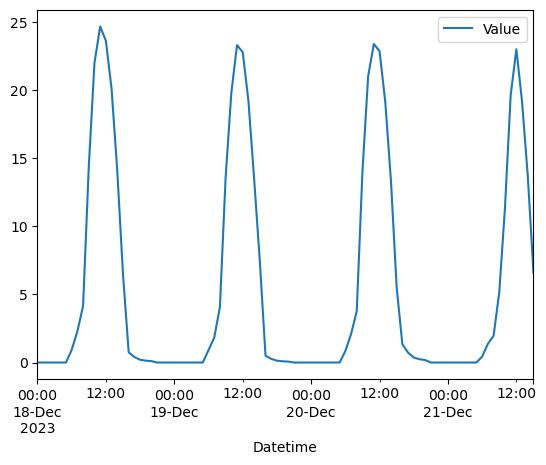

In [54]:
#Energy_Ameno_2_8_0_BBB6052.Wh (pv) real
ts[ts.index >= pd.Timestamp("2023-12-18 00:00:00")].plot()

<Axes: >

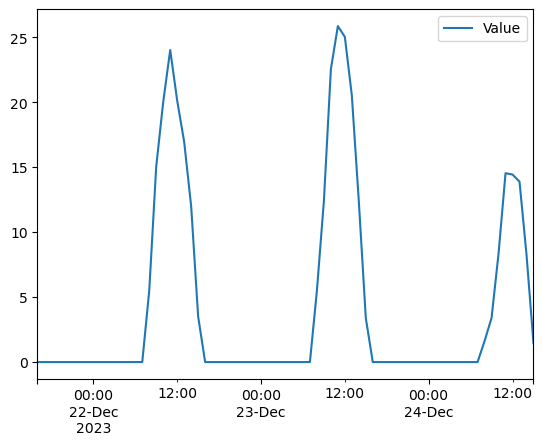

In [69]:
#Energy_Ameno_2_8_0_BBB6052.Wh (pv) pred
df.plot()

<Axes: xlabel='Datetime'>

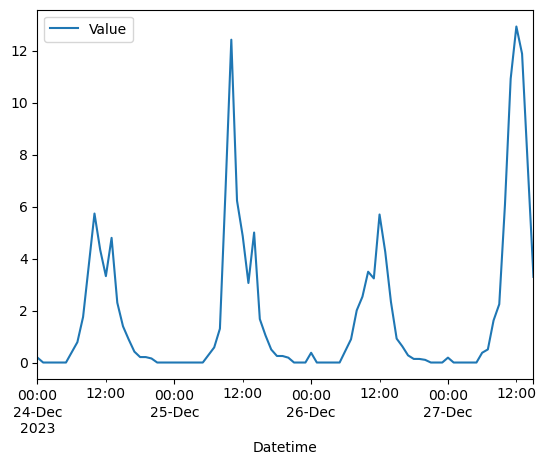

In [72]:
#Energy_Ameno_2_8_0_BBB6062.Wh (pv) real
ts[ts.index >= pd.Timestamp("2023-12-24 00:00:00")].plot()

<Axes: >

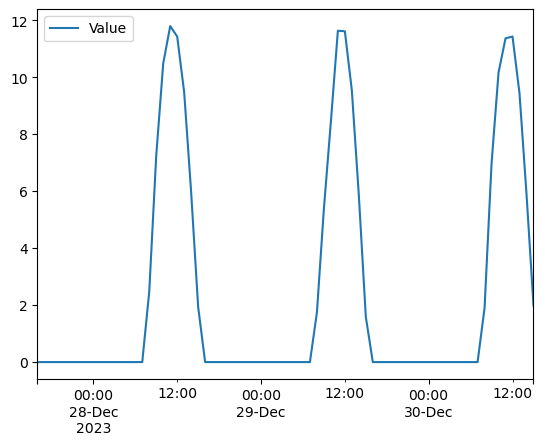

In [8]:
#Energy_Ameno_2_8_0_BBB6062.Wh (pv) pred
df.plot()